In [6]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import keras
%cd "D:\14-08-2023"

D:\14-08-2023


In [7]:
# Importing data set
# to read the CSV file
bikedf=pd.read_csv("SeoulBikeData.csv",encoding='unicode_escape')

In [8]:
bikedf.tail() # Gives bottom 5 rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
bikedf.info() # gives the information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
bikedf.drop("Date",axis=1,inplace=True) # Dropping  Date column

In [11]:
bikedf["Rented Bike Count"].describe() # Gives the statistical information of variables

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

<Figure size 3000x1500 with 0 Axes>

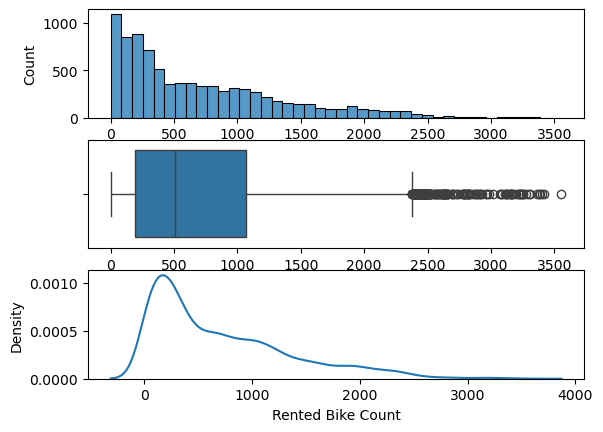

In [12]:
# Ploting the Rented Bike Count variable
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(bikedf["Rented Bike Count"],ax=ax[0])
sns.boxplot(bikedf["Rented Bike Count"],orient="h",ax=ax[1])
sns.kdeplot(bikedf["Rented Bike Count"],ax=ax[2])
plt.show()

In [13]:
bikedf["Rented Bike Count"].groupby(bikedf["Seasons"]).mean()

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

In [14]:
bikedf["Rented Bike Count"].groupby(bikedf["Holiday"]).mean()

Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64

In [15]:
bikedf["Rented Bike Count"].groupby(bikedf["Functioning Day"]).mean()

Functioning Day
No       0.000000
Yes    729.156999
Name: Rented Bike Count, dtype: float64

In [16]:
bikedf["Rented Bike Count"].groupby(bikedf["Hour"]).mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

<Axes: xlabel='Hour'>

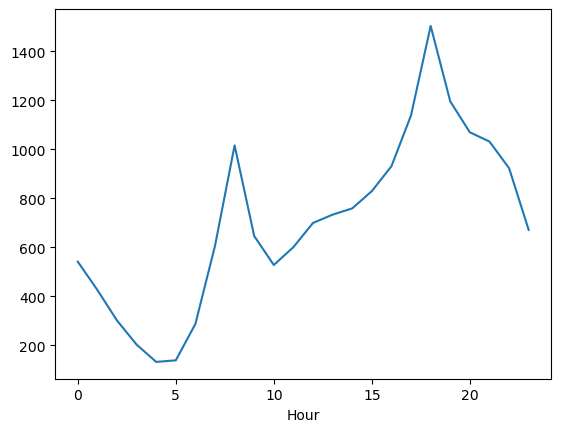

In [17]:
bikedf["Rented Bike Count"].groupby(bikedf["Hour"]).mean().plot(kind="line")

Cross tabulation & Stacked bar Plot with datalabels
Season and holiday
Season and functional day

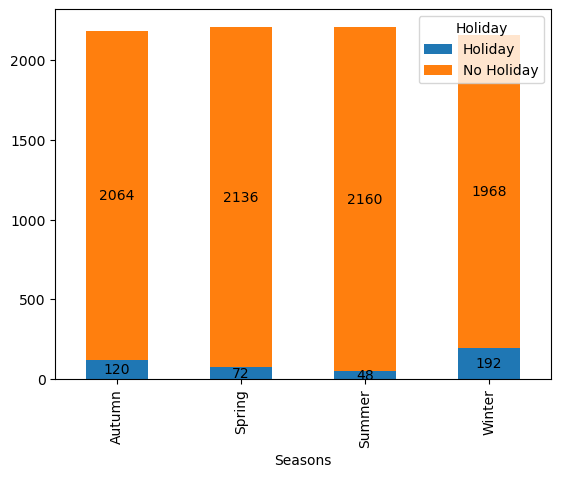

In [18]:
ax=pd.crosstab(bikedf["Seasons"],bikedf["Holiday"]).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i,label_type="center")

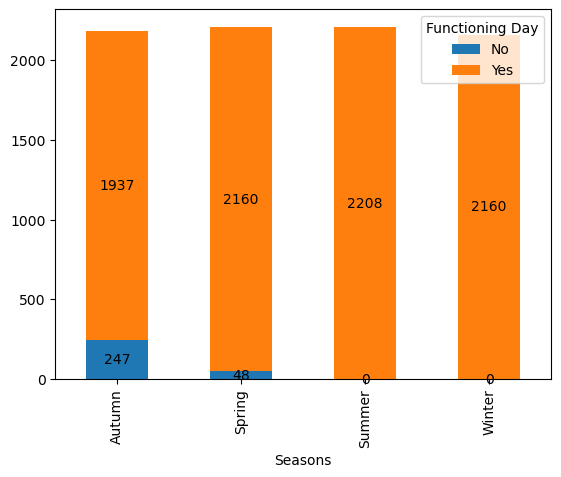

In [19]:
ax=pd.crosstab(bikedf["Seasons"],bikedf["Functioning Day"]).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i,label_type="center")

Pie Diagram of holiday, seasons with percentages

<Axes: ylabel='count'>

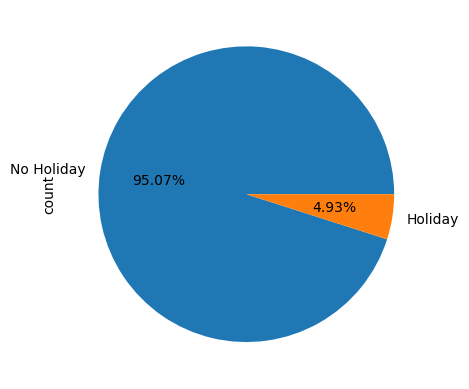

In [20]:
bikedf["Holiday"].value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

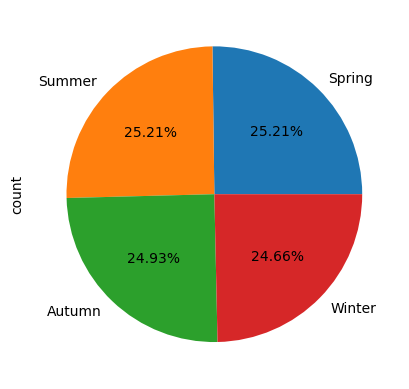

In [21]:
bikedf["Seasons"].value_counts().plot(kind="pie",autopct="%.2f%%")

Hypothesis Test – Null & Alternate Hypothesis, Split Data, Conduct test and interpret
Test Null Average Rented Bike Count on holiday/no holiday equal
Test Null Average Visibility on holiday/no holiday equal

Test Null Average Rented Bike Count on holiday/no holiday equal

In [22]:
# Null - There is no Significant difference in Rented Bike Count
# on holiday/no holiday equal
# Alt - There is Significant difference in Rented Bike Count
# on holiday/no holiday equal

In [23]:
bikedf["Rented Bike Count"].groupby(bikedf["Holiday"]).mean()

Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64

In [24]:
bikedf["Rented Bike Count"].groupby(bikedf["Holiday"]).var()

Holiday
Holiday       325781.553316
No Holiday    418452.601415
Name: Rented Bike Count, dtype: float64

In [25]:
#spliting data
holiday=bikedf[bikedf["Holiday"]=="Holiday"]
noholiday=bikedf[bikedf["Holiday"]=="No Holiday"]

In [26]:
from scipy.stats import ttest_ind

In [27]:
ttest_ind(holiday["Rented Bike Count"],noholiday["Rented Bike Count"],equal_var=False)
#Since pvalue=1.545340334026087e-13 is lessthan 0.05,reject null


TtestResult(statistic=-7.5973291340447595, pvalue=1.545340334026087e-13, df=490.2348748164145)

Test Null Average Visibility on holiday/no holiday equal

In [28]:
# Null - There is no Significant difference in Visibility
# on holiday/no holiday equal
# Alt - There is Significant difference in Visibility
# on holiday/no holiday equal

In [29]:
bikedf["Visibility (10m)"].groupby(bikedf["Holiday"]).mean()

Holiday
Holiday       1521.680556
No Holiday    1432.424111
Name: Visibility (10m), dtype: float64

In [30]:
bikedf["Visibility (10m)"].groupby(bikedf["Holiday"]).var()

Holiday
Holiday       405524.644818
No Holiday    367841.516037
Name: Visibility (10m), dtype: float64

In [31]:
#spliting data
holiday=bikedf[bikedf["Holiday"]=="Holiday"]
noholiday=bikedf[bikedf["Holiday"]=="No Holiday"]

In [32]:
ttest_ind(holiday["Visibility (10m)"],noholiday["Visibility (10m)"],equal_var=False)
#Since pvalue=0.004605416276474864 is lessthan 0.05,reject null

TtestResult(statistic=2.84700685823211, pvalue=0.004605416276474864, df=472.45969450910803)

Test Null Average Rented Bike Count of different seasons equal


In [33]:
# Null - There is no Significant difference in Average Rented Bike Count of different seasons equal
# Alt - There is Significant difference in Average Rented Bike Count of different seasons equal


In [34]:
bikedf["Rented Bike Count"].groupby(bikedf["Seasons"]).mean()

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

In [35]:
autumn=bikedf[bikedf["Seasons"]=="Autumn"]
spring=bikedf[bikedf["Seasons"]=="Spring"]
summer=bikedf[bikedf["Seasons"]=="Summer"]
winter=bikedf[bikedf["Seasons"]=="Winter"]


In [36]:
from scipy.stats import f_oneway

In [37]:
f_oneway(autumn["Rented Bike Count"],spring["Rented Bike Count"],summer["Rented Bike Count"],winter["Rented Bike Count"])
#Since pvalue=0.0 is lessthan 0.05,reject null

F_onewayResult(statistic=776.4678149879506, pvalue=0.0)

Test Null Average Temperature of different seasons equal

In [38]:
# Null - There is no Significant difference in Average Temperature of different seasons equal
# Alt - There is Significant difference in Average Temperature of different seasons equal


In [39]:
bikedf["Temperature(°C)"].groupby(bikedf["Seasons"]).mean()

Seasons
Autumn    14.120833
Spring    13.046694
Summer    26.582790
Winter    -2.540463
Name: Temperature(°C), dtype: float64

In [40]:
autumn=bikedf[bikedf["Seasons"]=="Autumn"]
spring=bikedf[bikedf["Seasons"]=="Spring"]
summer=bikedf[bikedf["Seasons"]=="Summer"]
winter=bikedf[bikedf["Seasons"]=="Winter"]


In [41]:
f_oneway(autumn["Temperature(°C)"],spring["Temperature(°C)"],summer["Temperature(°C)"],winter["Temperature(°C)"])
#Since pvalue=0.0 is lessthan 0.05,reject null

F_onewayResult(statistic=8548.519721985991, pvalue=0.0)

Test Null No Association between seasons and holiday


In [42]:
from scipy.stats import chi2_contingency

In [43]:
chi2_contingency(pd.crosstab(bikedf["Seasons"],bikedf["Holiday"]))
# since pvalue=2.1388791104963462e-26 is lessthan 0.05, reject null

Chi2ContingencyResult(statistic=122.58722091136573, pvalue=2.1388791104963462e-26, dof=3, expected_freq=array([[ 107.70410959, 2076.29589041],
       [ 108.88767123, 2099.11232877],
       [ 108.88767123, 2099.11232877],
       [ 106.52054795, 2053.47945205]]))

Test Null No Association between season and functional day

In [44]:
chi2_contingency(pd.crosstab(bikedf["Seasons"],bikedf["Functioning Day"]))
# since pvalue=1.6230534456666303e-126 is lessthan 0.05, reject null

Chi2ContingencyResult(statistic=585.2066161470536, pvalue=1.62305344566663e-126, dof=3, expected_freq=array([[  73.54794521, 2110.45205479],
       [  74.35616438, 2133.64383562],
       [  74.35616438, 2133.64383562],
       [  72.73972603, 2087.26027397]]))

Split Data into numeric and object cols

In [45]:
numcols=bikedf.select_dtypes(include=np.number)
objcols=bikedf.select_dtypes(include=["object"])

In [46]:
print(numcols.shape)
print(objcols.shape)

(8760, 10)
(8760, 3)


Correlation and Covariance Analysis of numeric variables and heatmap and pairplot

In [47]:
numcols.cov()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,416021.733390,1831.818358,4149.257754,-2623.853782,80.950203,78187.849382,3199.299111,146.717508,-89.558657,-39.946114
Hour,1831.818358,47.922137,10.262907,-34.062222,2.045964,415.850668,0.276150,0.872813,0.068061,-0.065053
Temperature(°C),4149.257754,10.262907,142.678850,38.763038,-0.448739,252.817084,142.400017,3.668334,0.677602,-1.139387
Humidity(%),-2623.853782,-34.062222,38.763038,414.627875,-7.104540,-6726.950421,142.782065,-8.171237,5.430677,0.962098
Wind speed (m/s),80.950203,2.045964,-0.448739,-7.104540,1.073918,108.114660,-2.388639,0.299140,-0.023002,-0.001609
Visibility (10m),78187.849382,415.850668,252.817084,-6726.950421,108.114660,370027.323001,-1403.253586,79.130141,-115.040313,-32.330842
Dew point temperature(°C),3199.299111,0.276150,142.400017,142.782065,-2.388639,-1403.253586,170.573247,1.070865,1.850620,-0.860668
Solar Radiation (MJ/m2),146.717508,0.872813,3.668334,-8.171237,0.299140,79.130141,1.070865,0.754720,-0.072813,-0.027432
Rainfall(mm),-89.558657,0.068061,0.677602,5.430677,-0.023002,-115.040313,1.850620,-0.072813,1.272819,0.004188
Snowfall (cm),-39.946114,-0.065053,-1.139387,0.962098,-0.001609,-32.330842,-0.860668,-0.027432,0.004188,0.190747


In [48]:
numcols.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


<Axes: >

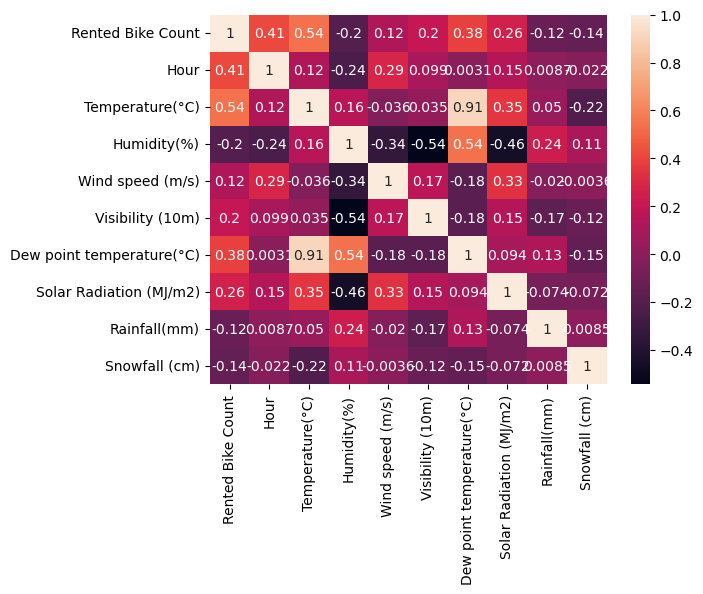

In [49]:
sns.heatmap(numcols.corr(),annot = True)

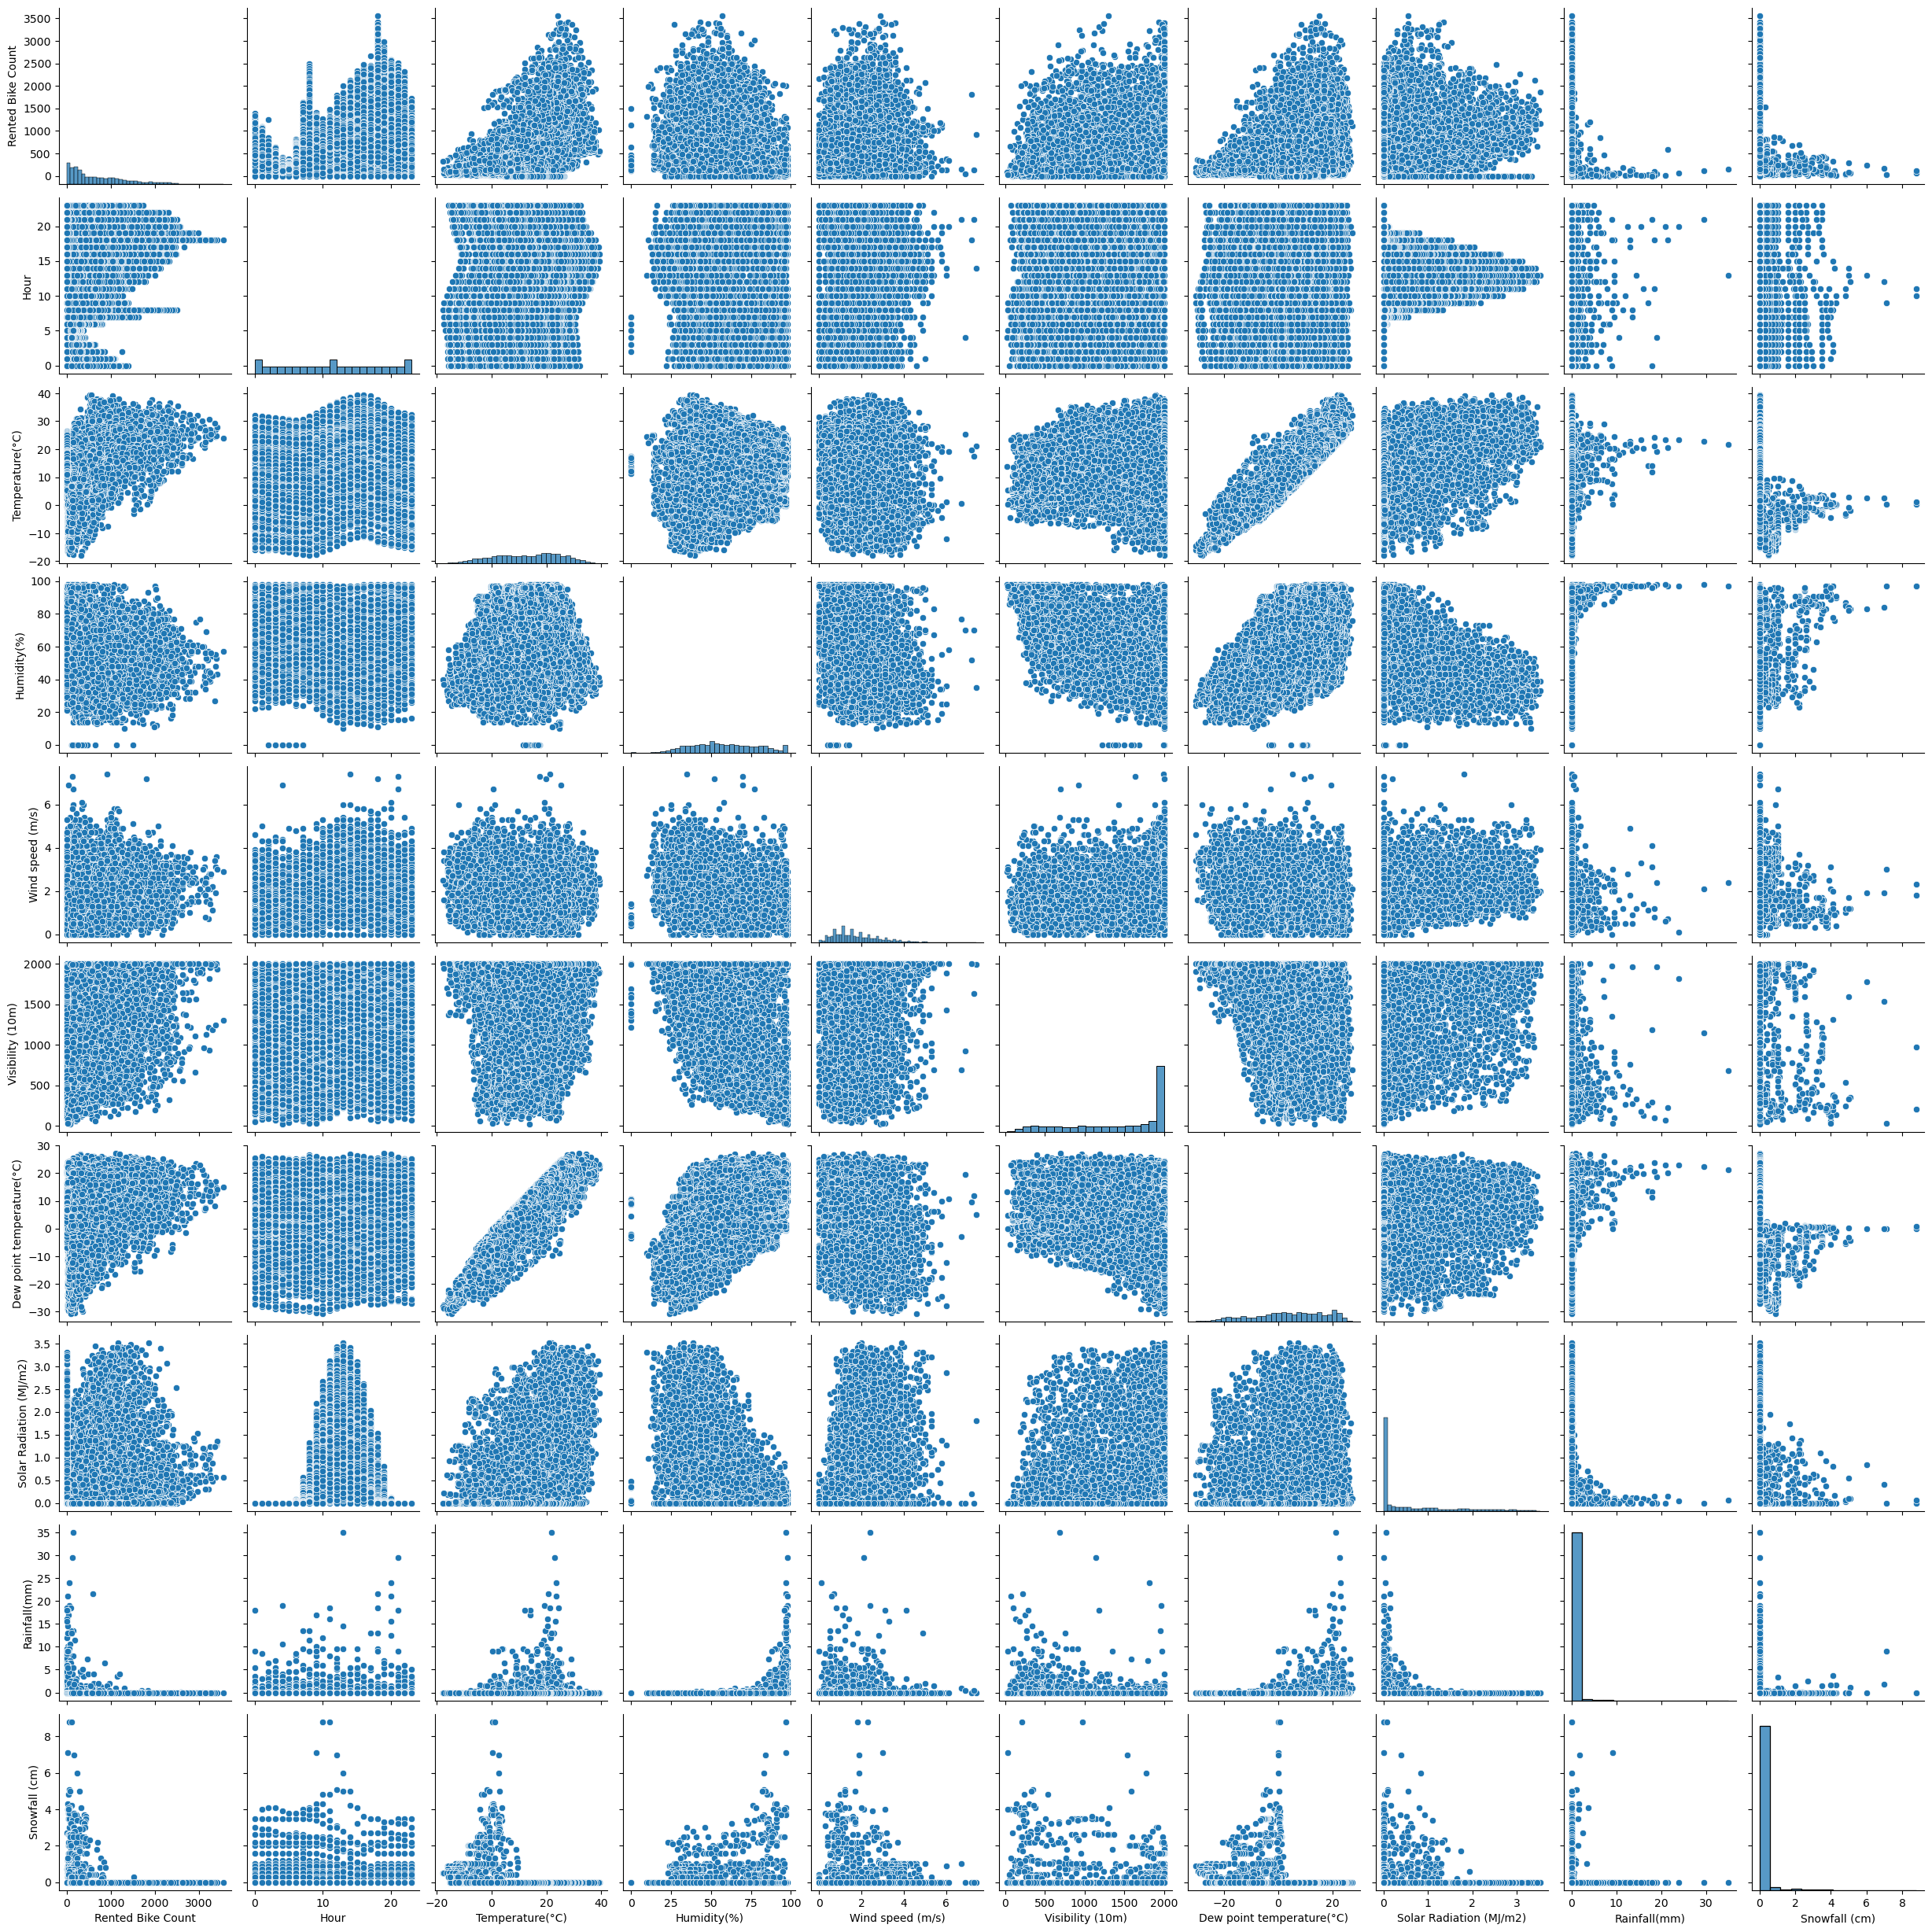

In [50]:
sns.pairplot(numcols)

Boxplots of all numeric variables - interpret

Text(0.5, 1.0, 'Boxplots For All Numeric Variables')

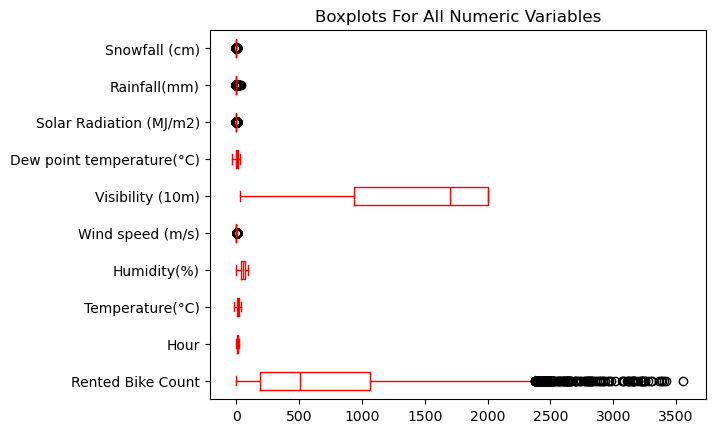

In [51]:
# Boxplots of all numeric variables - interpret
numcols.plot(kind ="box", vert = False, color = "red")
plt.title("Boxplots For All Numeric Variables")

In [52]:
y=numcols["Rented Bike Count"]

In [53]:
numcols.drop("Rented Bike Count",axis=1,inplace=True)

In [54]:
numcols.shape

(8760, 9)

In [55]:
numcols.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [56]:
objcols.columns

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

Scale – Standard Scaler, Min Max Scaler, Robust Scaler

In [57]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()

In [59]:
numcols_scaled=scaler.fit_transform(numcols)

In [60]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [61]:
numcols_scaled.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891


In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
minmax=MinMaxScaler()

In [64]:
numcols_minmax=minmax.fit_transform(numcols)

In [65]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [66]:
numcols_minmax.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0.000000,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0
1,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0
2,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0
3,0.130435,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0
4,0.173913,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0


In [67]:
from sklearn.preprocessing import RobustScaler

In [68]:
robust=RobustScaler()

In [69]:
numcols_robust=robust.fit_transform(numcols)

In [70]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [71]:
numcols_robust.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,-1.000000,-0.994737,-0.62500,0.500000,0.284906,-1.164103,-0.010753,0.0,0.0
1,-0.913043,-1.010526,-0.59375,-0.500000,0.284906,-1.164103,-0.010753,0.0,0.0
2,-0.826087,-1.036842,-0.56250,-0.357143,0.284906,-1.169231,-0.010753,0.0,0.0
3,-0.739130,-1.047368,-0.53125,-0.428571,0.284906,-1.164103,-0.010753,0.0,0.0
4,-0.652174,-1.036842,-0.65625,0.571429,0.284906,-1.215385,-0.010753,0.0,0.0


Dummy encode Object cols

In [73]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [74]:
# Apply label encoding to each object column
for col in objcols:
    objcols[col] = label_encoder.fit_transform(objcols[col])

In [75]:
objcols

,Seasons,Holiday,Functioning Day
0,3,1,1
1,3,1,1
2,3,1,1
3,3,1,1
4,3,1,1
...,...,...,...
8755,0,1,1
8756,0,1,1
8757,0,1,1
8758,0,1,1


In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
y=LabelEncoder().fit_transform(y)

In [78]:
combined=pd.concat([numcols,objcols],axis=1)


In [79]:
combined["Rented Bike Count"]=y

Multicollinearity Analysis

In [80]:
np.round(combined.corr(),2)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
Hour,1.00,0.12,-0.24,0.29,0.10,0.00,0.15,0.01,-0.02,-0.00,0.00,0.01,0.41
Temperature(°C),0.12,1.00,0.16,-0.04,0.03,0.91,0.35,0.05,-0.22,-0.34,0.06,-0.05,0.56
Humidity(%),-0.24,0.16,1.00,-0.34,-0.54,0.54,-0.46,0.24,0.11,-0.12,0.05,-0.02,-0.21
Wind speed (m/s),0.29,-0.04,-0.34,1.00,0.17,-0.18,0.33,-0.02,-0.00,0.11,-0.02,0.01,0.12
Visibility (10m),0.10,0.03,-0.54,0.17,1.00,-0.18,0.15,-0.17,-0.12,-0.01,-0.03,-0.03,0.20
Dew point temperature(°C),0.00,0.91,0.54,-0.18,-0.18,1.00,0.09,0.13,-0.15,-0.33,0.07,-0.05,0.39
Solar Radiation (MJ/m2),0.15,0.35,-0.46,0.33,0.15,0.09,1.00,-0.07,-0.07,-0.08,0.01,-0.01,0.29
Rainfall(mm),0.01,0.05,0.24,-0.02,-0.17,0.13,-0.07,1.00,0.01,-0.02,0.01,0.00,-0.13
Snowfall (cm),-0.02,-0.22,0.11,-0.00,-0.12,-0.15,-0.07,0.01,1.00,0.15,0.01,0.03,-0.15
Seasons,-0.00,-0.34,-0.12,0.11,-0.01,-0.33,-0.08,-0.02,0.15,1.00,-0.05,0.22,-0.27


In [81]:
combined.drop("Dew point temperature(°C)",axis=1,inplace=True)

In [82]:
combined.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1,253
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1,203
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1,172
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1,106
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1,77


In [83]:
np.round(combined.corr(),2)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
Hour,1.00,0.12,-0.24,0.29,0.10,0.15,0.01,-0.02,-0.00,0.00,0.01,0.41
Temperature(°C),0.12,1.00,0.16,-0.04,0.03,0.35,0.05,-0.22,-0.34,0.06,-0.05,0.56
Humidity(%),-0.24,0.16,1.00,-0.34,-0.54,-0.46,0.24,0.11,-0.12,0.05,-0.02,-0.21
Wind speed (m/s),0.29,-0.04,-0.34,1.00,0.17,0.33,-0.02,-0.00,0.11,-0.02,0.01,0.12
Visibility (10m),0.10,0.03,-0.54,0.17,1.00,0.15,-0.17,-0.12,-0.01,-0.03,-0.03,0.20
Solar Radiation (MJ/m2),0.15,0.35,-0.46,0.33,0.15,1.00,-0.07,-0.07,-0.08,0.01,-0.01,0.29
Rainfall(mm),0.01,0.05,0.24,-0.02,-0.17,-0.07,1.00,0.01,-0.02,0.01,0.00,-0.13
Snowfall (cm),-0.02,-0.22,0.11,-0.00,-0.12,-0.07,0.01,1.00,0.15,0.01,0.03,-0.15
Seasons,-0.00,-0.34,-0.12,0.11,-0.01,-0.08,-0.02,0.15,1.00,-0.05,0.22,-0.27
Holiday,0.00,0.06,0.05,-0.02,-0.03,0.01,0.01,0.01,-0.05,1.00,0.03,0.07


In [84]:
X=combined.drop(["Rented Bike Count","Temperature(°C)"],axis=1)
y=combined["Rented Bike Count"]

In [85]:
X.shape

(8760, 10)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# now lets make  the ANN

In [88]:
# Initialising the ANN
model = Sequential()

In [89]:
# Adding the input layer and first hidden layer
model.add(Dense(units=10,kernel_initializer="he_uniform",activation="relu",input_dim=10))

In [90]:
# Adding the Second hidden layer
model.add(Dense(units=8,kernel_initializer="he_uniform",activation="relu"))

In [91]:
# Adding the Third hidden layer
model.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))

In [92]:
# Adding the output layer
model.add(Dense(units=1,activation="linear"))

In [93]:
# Compiling ANN
model.compile(optimizer="adam",loss='mean_squared_error',metrics=[keras.metrics.RootMeanSquaredError()])

In [94]:
# Fitting the ANN to the Training set
model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100

470/470 [==============================] - 5s 7ms/step - loss: 343966.7500 - root_mean_squared_error: 586.4868 - val_loss: 323725.8125 - val_root_mean_squared_error: 568.9691
Epoch 2/100
470/470 [==============================] - 2s 4ms/step - loss: 334888.7188 - root_mean_squared_error: 578.6957 - val_loss: 326692.6875 - val_root_mean_squared_error: 571.5704
Epoch 3/100
470/470 [==============================] - 2s 4ms/step - loss: 331500.0625 - root_mean_squared_error: 575.7604 - val_loss: 317180.5312 - val_root_mean_squared_error: 563.1878
Epoch 4/100
470/470 [==============================] - 2s 5ms/step - loss: 327191.7500 - root_mean_squared_error: 572.0068 - val_loss: 312214.1250 - val_root_mean_squared_error: 558.7612
Epoch 5/100
470/470 [==============================] - 2s 4ms/step - loss: 321487.5625 - root_mean_squared_error: 566.9987 - val_loss: 307841.3438 - val_root_mean_squared_error: 554.8345
Epoch 6/100
470/470 [==============================] - 2s 5ms/st

In [95]:
# List all data in history
print(model_history.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


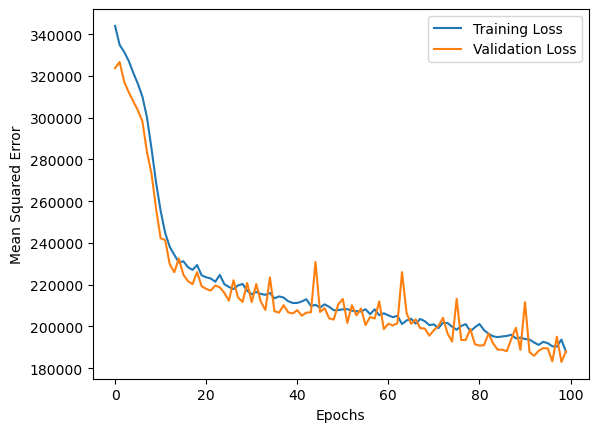

In [96]:
# Plot the training model_history
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

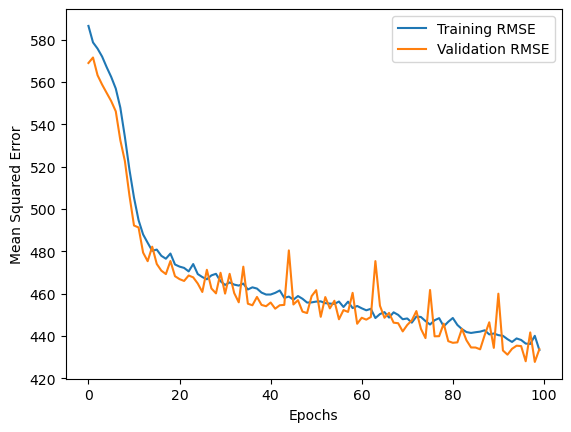

In [97]:
# Plot the training model_history
plt.plot(model_history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(model_history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

 Making Predictions and Evaluating the model

In [98]:
y_pred=model.predict(X_test)

55/55 [==============================] - 0s 4ms/step


In [99]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 202288.95257304655
